In [38]:
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [39]:
#### Molecular weights

moses10k = pickle.load(open("dataset/moses10kstat.pickle","rb"))
graphAF = pickle.load(open("dataset/test_100molstat.pickle","rb"))
MCNN1 = pickle.load(open("dataset/41_without_resamplestat.pickle","rb"))


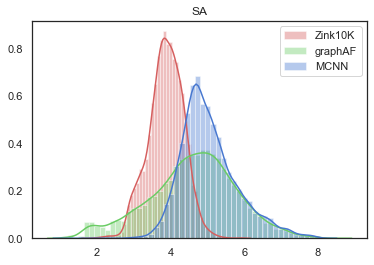

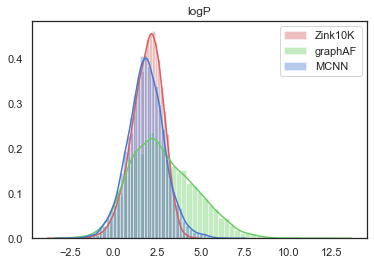

In [40]:

##### Figures of continuous attributes
keys = ['qed', 'mw', 'SA', 'logP']
#keys = ['qed', 'mw', 'logP', 'SA', 'cycle']

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)
for key in keys:
    # Set up the matplotlib figure
    plt.figure()
    plt.title(key)
    sns.distplot(moses10k[key], kde=True, color="r", label='Zink10K')
    sns.distplot(graphAF[key], kde=True, color="g", label='graphAF')
    sns.distplot(MCNN1[key], kde=True, color="b", label='MCNN')
    plt.legend()
    plt.show()


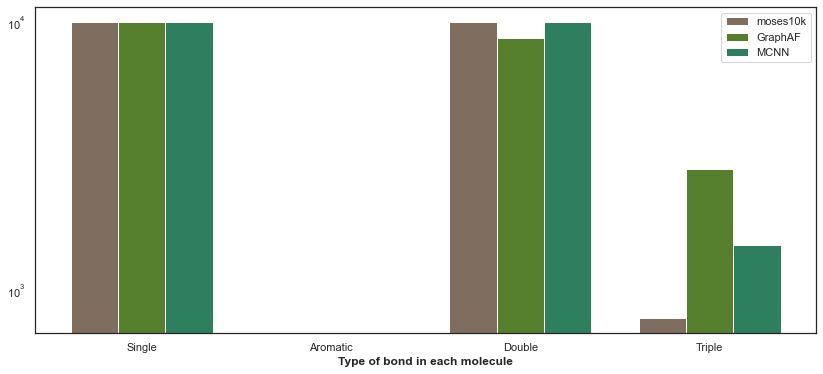

In [35]:
# Make types of bond in each atom
plt.figure(figsize=(14,6))
# set width of bar
barWidth = 0.25
# set height of bar
bars1 = list(moses10k['bond_atom'].values())
bars2 = list(graphAF['bond_atom'].values())
bars3 = list(MCNN1['bond_atom'].values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='moses10k')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='GraphAF')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='MCNN')

# Add xticks on the middle of the group bars
plt.xlabel('Type of bond in each molecule', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Single', 'Aromatic', 'Double', 'Triple'])
plt.yscale('log')
# Create legend & Show graphic
plt.legend()
plt.show()


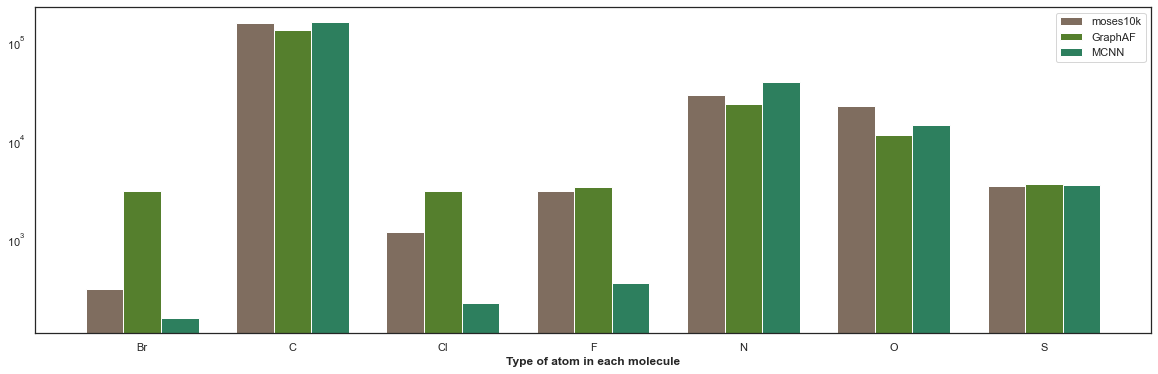

In [30]:
# Make correction
## Types of atom in each molecule
### Sort function - necessary

keys = ['Br', 'C', 'Cl', 'F','N','O','S']

# Make types of atom in each atom
plt.figure(figsize=(20,6))
# set width of bar
barWidth = 0.25
# set height of bar

bars1 = [moses10k['atom_all'][key] for key in keys]
bars2 = [graphAF['atom_all'][key] for key in keys]
bars3 = [MCNN1['atom_all'][key] for key in keys]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='moses10k')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='GraphAF')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='MCNN')

# Add xticks on the middle of the group bars
plt.xlabel('Type of atom in each molecule', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Br', 'C', 'Cl', 'F','N','O','S'])
plt.yscale('log')
# Create legend & Show graphic
plt.legend()
plt.show()


In [31]:
def Convert(tup, di): 
    for a, b in tup: 
        di.setdefault(a, []).append(b) 
    return di 



print('Types of bonds in each mol:')
print(f"moses10k = {moses10k['bond_atom']}")
print(f"graphAF = {graphAF['bond_atom']}")
print(f"MCNN1 = {MCNN1['bond_atom']}")
print('-----------------------------')
print('ALL types of bonds:')
print(f"moses10k = {moses10k['bond_all']}")
print(f"graphAF = {graphAF['bond_all']}")
print(f"MCNN1 = {MCNN1['bond_all']}")
print('-----------------------------')
print('Types of atom in each mol:')
print(f"moses10k = {Convert(sorted(moses10k['atom_dict'].items()),{})}")
print(f"graphAF = {Convert(sorted(graphAF['atom_dict'].items()),{})}")
print(f"MCNN1 = {Convert(sorted(MCNN1['atom_dict'].items()),{})}")
print('-----------------------------')
print('All atom:')
print(f"moses10k = {Convert(sorted(moses10k['atom_all'].items()),{})}")
print(f"graphAF = {Convert(sorted(graphAF['atom_all'].items()),{})}")
print(f"MCNN1 = {Convert(sorted(MCNN1['atom_all'].items()),{})}")

Types of bonds in each mol:
moses10k = {'SINGLE': 10000, 'AROMATIC': 0, 'DOUBLE': 9998, 'TRIPLE': 789}
graphAF = {'SINGLE': 10000, 'AROMATIC': 0, 'DOUBLE': 8685, 'TRIPLE': 2832}
MCNN1 = {'SINGLE': 10000, 'AROMATIC': 0, 'DOUBLE': 9989, 'TRIPLE': 1478}
-----------------------------
ALL types of bonds:
moses10k = {'SINGLE': 167617, 'AROMATIC': 0, 'DOUBLE': 63459, 'TRIPLE': 822}
graphAF = {'SINGLE': 135595, 'AROMATIC': 0, 'DOUBLE': 40695, 'TRIPLE': 3292}
MCNN1 = {'SINGLE': 177966, 'AROMATIC': 0, 'DOUBLE': 64208, 'TRIPLE': 1521}
-----------------------------
Types of atom in each mol:
moses10k = {'Br': [317], 'C': [10000], 'Cl': [1068], 'F': [1880], 'N': [9897], 'O': [9657], 'S': [3136]}
graphAF = {'Br': [2433], 'C': [10000], 'Cl': [2488], 'F': [2525], 'N': [8355], 'O': [6372], 'S': [2935]}
MCNN1 = {'Br': [159], 'C': [10000], 'Cl': [229], 'F': [355], 'N': [9908], 'O': [8056], 'S': [3082]}
-----------------------------
All atom:
moses10k = {'Br': [319], 'C': [156104], 'Cl': [1196], 'F': [311